# Ch.6 Financial Time Series

In [1]:
#Choose the defauly plotting style
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## pandas Basics

In [2]:
import numpy as np, pandas as pd
#import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [6]:
df.loc['c']  # selection via index, in Python2.7, this command line is df.ix['c']

numbers    30
Name: c, dtype: int64

In [7]:
df.loc[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.loc[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated, and share the same index
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column, and index will come with it

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
# if the index is duplicated, it will report 'error'
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed, and the index is initalzied as by their order

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
#here it is not temporary, because the .append() result is assigned to df
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
#What you can see here is that pandas by default accepts only values for those indices that already exist.

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')

#In our case, we use how="outer" to use the union of all values from both indices:
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6) #save the first 6 digits of the initial data

array([[ 0.847286,  0.758949, -0.542061, -1.550076],
       [ 0.865532, -1.284936, -0.160605,  0.543422],
       [-1.527511,  0.427352,  0.72053 ,  2.970345],
       [-2.5013  ,  0.147149, -1.461053,  1.160216],
       [ 0.982577,  1.647671, -0.967906, -1.217071],
       [ 0.909099, -1.051288,  1.307987,  0.772138],
       [ 0.597111, -0.035481,  0.498137, -2.408611],
       [ 0.970071, -0.050838,  1.286886, -0.353187],
       [-0.340719, -0.210971, -0.179653, -1.139246]])

In [22]:
df = pd.DataFrame(a) #Convert is into pands.DataFrame format
df 

,0,1,2,3
0,0.847286,0.758949,-0.542061,-1.550076
1,0.865532,-1.284936,-0.160605,0.543422
2,-1.527511,0.427352,0.720530,2.970345
3,-2.501300,0.147149,-1.461053,1.160216
4,0.982577,1.647671,-0.967906,-1.217071
5,0.909099,-1.051288,1.307987,0.772138
6,0.597111,-0.035481,0.498137,-2.408611
7,0.970071,-0.050838,1.286886,-0.353187
8,-0.340719,-0.210971,-0.179653,-1.139246


In [23]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,0.847286,0.758949,-0.542061,-1.550076
1,0.865532,-1.284936,-0.160605,0.543422
2,-1.527511,0.427352,0.720530,2.970345
3,-2.501300,0.147149,-1.461053,1.160216
4,0.982577,1.647671,-0.967906,-1.217071
5,0.909099,-1.051288,1.307987,0.772138
6,0.597111,-0.035481,0.498137,-2.408611
7,0.970071,-0.050838,1.286886,-0.353187
8,-0.340719,-0.210971,-0.179653,-1.139246


In [24]:
df['No2'].iloc[3]  # value in column No2 at index position 3
# equal to df['No2'][3]

0.1471491013546839

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [84]:
pd.date_range?

'''
Signature: pd.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
Docstring:
Return a fixed frequency DatetimeIndex, with day (calendar) as the default
frequency
'''

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.847286,0.758949,-0.542061,-1.550076
2015-02-28,0.865532,-1.284936,-0.160605,0.543422
2015-03-31,-1.527511,0.427352,0.720530,2.970345
2015-04-30,-2.501300,0.147149,-1.461053,1.160216
2015-05-31,0.982577,1.647671,-0.967906,-1.217071
2015-06-30,0.909099,-1.051288,1.307987,0.772138
2015-07-31,0.597111,-0.035481,0.498137,-2.408611
2015-08-31,0.970071,-0.050838,1.286886,-0.353187
2015-09-30,-0.340719,-0.210971,-0.179653,-1.139246


In [27]:
np.array(df).round(6) 
## show that the DataFrame can be converted into numpy array format

array([[ 0.847286,  0.758949, -0.542061, -1.550076],
       [ 0.865532, -1.284936, -0.160605,  0.543422],
       [-1.527511,  0.427352,  0.72053 ,  2.970345],
       [-2.5013  ,  0.147149, -1.461053,  1.160216],
       [ 0.982577,  1.647671, -0.967906, -1.217071],
       [ 0.909099, -1.051288,  1.307987,  0.772138],
       [ 0.597111, -0.035481,  0.498137, -2.408611],
       [ 0.970071, -0.050838,  1.286886, -0.353187],
       [-0.340719, -0.210971, -0.179653, -1.139246]])

### Basic Analytics

In [28]:
df.sum()

No1    0.802147
No2    0.347606
No3    0.502261
No4   -1.222070
dtype: float64

In [29]:
df.mean()

No1    0.089127
No2    0.038623
No3    0.055807
No4   -0.135786
dtype: float64

In [30]:
df.cumsum()  # cumulative sum

,No1,No2,No3,No4
2015-01-31,0.847286,0.758949,-0.542061,-1.550076
2015-02-28,1.712818,-0.525988,-0.702666,-1.006654
2015-03-31,0.185308,-0.098635,0.017863,1.963691
2015-04-30,-2.315993,0.048514,-1.443190,3.123907
2015-05-31,-1.333415,1.696184,-2.411096,1.906836
2015-06-30,-0.424316,0.644896,-1.103109,2.678974
2015-07-31,0.172795,0.609415,-0.604972,0.270363
2015-08-31,1.142866,0.558577,0.681914,-0.082824
2015-09-30,0.802147,0.347606,0.502261,-1.222070


In [31]:
df.describe() # print a brief summary of the data

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.089127,0.038623,0.055807,-0.135786
std,1.284082,0.886446,0.970155,1.658412
min,-2.501300,-1.284936,-1.461053,-2.408611
25%,-0.340719,-0.210971,-0.542061,-1.217071
50%,0.847286,-0.035481,-0.160605,-0.353187
75%,0.909099,0.427352,0.720530,0.772138
max,0.982577,1.647671,1.307987,2.970345


In [32]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2015-01-31,0.920481,0.871177,0.736248,1.245021
2015-02-28,0.930340,1.133550,0.400756,0.737172
2015-03-31,1.235925,0.653722,0.848840,1.723469
2015-04-30,1.581550,0.383600,1.208740,1.077133
2015-05-31,0.991250,1.283616,0.983822,1.103209
2015-06-30,0.953467,1.025323,1.143673,0.878714
2015-07-31,0.772729,0.188365,0.705788,1.551970
2015-08-31,0.984922,0.225472,1.134410,0.594295
2015-09-30,0.583711,0.459316,0.423855,1.067355


In [33]:
np.sqrt(abs(df)).sum()

No1    8.954376
No2    6.224142
No3    7.586132
No4    9.978338
dtype: float64

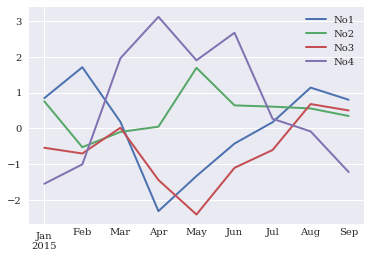

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df) # not df.type()

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    0.847286
2015-02-28    0.865532
2015-03-31   -1.527511
2015-04-30   -2.501300
2015-05-31    0.982577
2015-06-30    0.909099
2015-07-31    0.597111
2015-08-31    0.970071
2015-09-30   -0.340719
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

Text(0,0.5,'value')

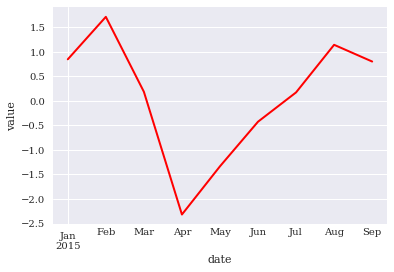

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.847286,0.758949,-0.542061,-1.550076,Q1
2015-02-28,0.865532,-1.284936,-0.160605,0.543422,Q1
2015-03-31,-1.527511,0.427352,0.720530,2.970345,Q1
2015-04-30,-2.501300,0.147149,-1.461053,1.160216,Q2
2015-05-31,0.982577,1.647671,-0.967906,-1.217071,Q2
2015-06-30,0.909099,-1.051288,1.307987,0.772138,Q2
2015-07-31,0.597111,-0.035481,0.498137,-2.408611,Q3
2015-08-31,0.970071,-0.050838,1.286886,-0.353187,Q3
2015-09-30,-0.340719,-0.210971,-0.179653,-1.139246,Q3


In [85]:
#Now, we can group by the “Quarter” column and 
#can output statistics for the single groups:
groups = df.groupby('Quarter')
groups

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.061769,-0.032878,0.005954,0.654564
Q2,-0.203208,0.247844,-0.373657,0.238428
Q3,0.408821,-0.099097,0.535123,-1.300348


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.865532,0.758949,0.720530,2.970345
Q2,0.982577,1.647671,1.307987,1.160216
Q3,0.970071,-0.035481,1.286886,-0.353187


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])
# .groupby()类似于一个二级标签，可以分块计算

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.865532 -1.284936 -0.160605  0.543422
        Odd      -0.340112  0.593150  0.089234  0.710134
Q2      Even     -0.796100 -0.452069 -0.076533  0.966177
        Odd       0.982577  1.647671 -0.967906 -1.217071
Q3      Even      0.970071 -0.050838  1.286886 -0.353187
        Odd       0.128196 -0.123226  0.159242 -1.773929

## Financial Data

In [48]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
raw.info() #学到了，非常make sense，可以避免把data plot出来

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [49]:
data = pd.DataFrame(raw['.SPX'])
data.columns = ['Close']

In [50]:
data.tail()

,Close
Date,
2017-10-25,2557.15
2017-10-26,2560.40
2017-10-27,2581.07
2017-10-30,2572.83
2017-10-31,2575.26


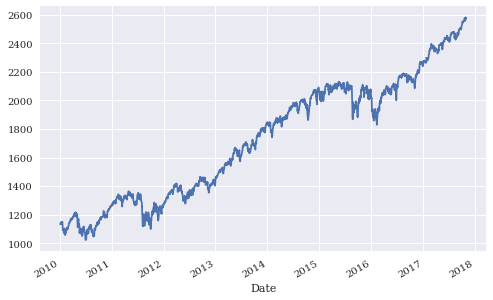

In [51]:
data['Close'].plot(figsize=(8, 5), grid=True);
# tag: dax
# title: Historical DAX index levels

In [52]:
%time data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

CPU times: user 2.25 ms, sys: 1.18 ms, total: 3.43 ms
Wall time: 2.33 ms


In [53]:
data[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2017-10-25,2557.15,-0.004674,-0.004674
2017-10-26,2560.40,0.001270,0.001270
2017-10-27,2581.07,0.008041,0.008041
2017-10-30,2572.83,-0.003198,-0.003198
2017-10-31,2575.26,0.000944,0.000944


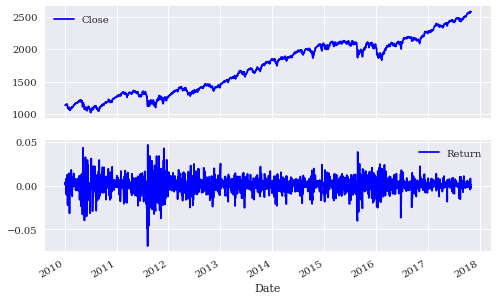

In [54]:
data[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True);
# tag: dax_returns
# title: The S&P 500 index and daily log returns

In [55]:
data['42d'] = data['Close'].rolling(window=42).mean()
data['252d'] = data['Close'].rolling(window=252).mean()
#data['42d']应该是从起始点的第42个数据开始才有值，每个值表示前42个点的均值

In [56]:
data[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-10-25,2557.15,2515.261429,2372.400873
2017-10-26,2560.40,2518.027143,2374.071389
2017-10-27,2581.07,2521.235952,2375.849286
2017-10-30,2572.83,2523.979762,2377.620794
2017-10-31,2575.26,2526.446667,2379.402976


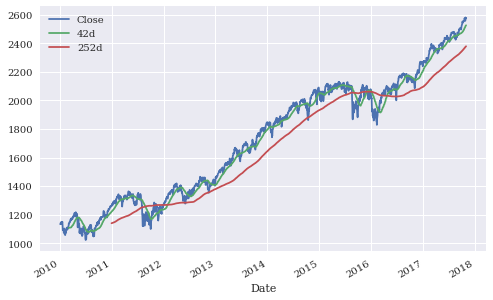

In [57]:
data[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The S&P index and moving averages

In [58]:
import math
data['Mov_Vol'] = data['Return'].rolling(window=252).std() * math.sqrt(252) #直接使用np.sqrt()不就得了。。。
# moving annual volatility

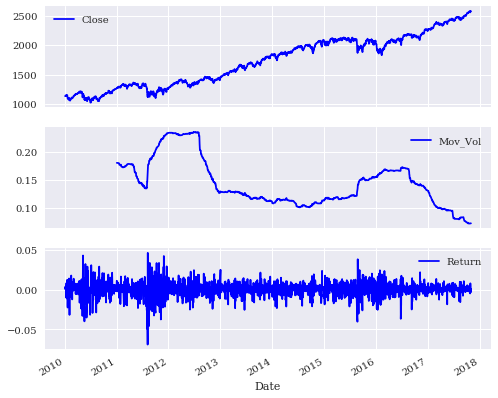

In [59]:
data[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True);
# tag: dax_mov_std
# title: The S&P index and moving, annualized volatility

## Regression Analysis

In [60]:
import pandas as pd

In [61]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
spx = pd.DataFrame(raw['.SPX'])

In [62]:
np.round(spx.tail())

,.SPX
Date,
2017-10-25,2557.0
2017-10-26,2560.0
2017-10-27,2581.0
2017-10-30,2573.0
2017-10-31,2575.0


In [63]:
vix = pd.DataFrame(raw['.VIX'])
vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
.VIX    1972 non-null float64
dtypes: float64(1)
memory usage: 30.8 KB


In [64]:
data = spx.join(vix)

In [65]:
data.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


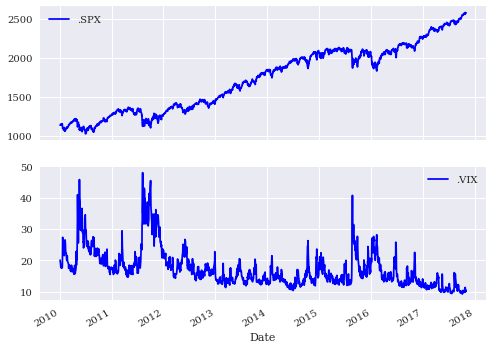

In [66]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6));
# tag: spx_vix
# title: The S&P 500 Index and the VIX volatility index

In [67]:
rets = np.log(data / data.shift(1)) 
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [68]:
rets.dropna(inplace=True)

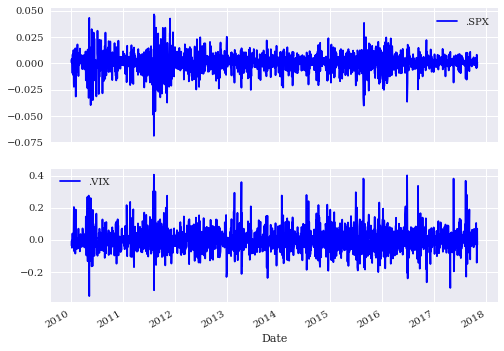

In [69]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6));
# tag: es50_vs_rets
# title: Log returns of S&P500 and VIX

In [70]:
import numpy as np

In [71]:
xdat = rets['.SPX'].values
ydat = rets['.VIX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([-6.45336250e+00,  2.34474296e-03])

Text(0,0.5,'VIX returns')

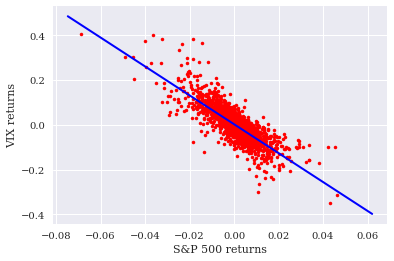

In [72]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('VIX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [73]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


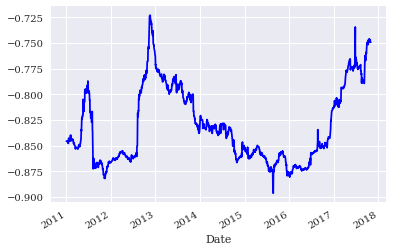

In [74]:
rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between S&P 500 and VIX

## High Frequency Data

In [75]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [76]:
# data from FXCM Forex Capital Markets Ltd.
eur_usd = pd.read_csv('source/fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

In [77]:
eur_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
Bid    17352 non-null float64
Ask    17352 non-null float64
dtypes: float64(2)
memory usage: 406.7 KB


In [78]:
eur_usd['Mid'] = eur_usd.mean(axis=1)

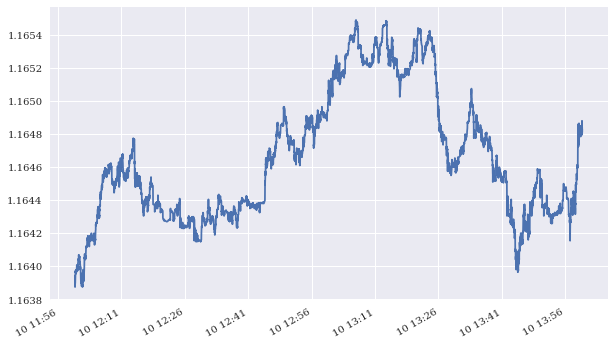

In [79]:
eur_usd['Mid'].plot(figsize=(10, 6));
# tag: eur_uusd
# title: EUR/USD tick data for two hours

In [80]:
eur_usd_resam = eur_usd.resample(rule='1min', label='last').last()
eur_usd_resam.head()

,Bid,Ask,Mid
2017-11-10 12:00:00,1.16406,1.16407,1.164065
2017-11-10 12:01:00,1.16396,1.16397,1.163965
2017-11-10 12:02:00,1.16416,1.16418,1.164170
2017-11-10 12:03:00,1.16417,1.16417,1.164170
2017-11-10 12:04:00,1.16425,1.16427,1.164260


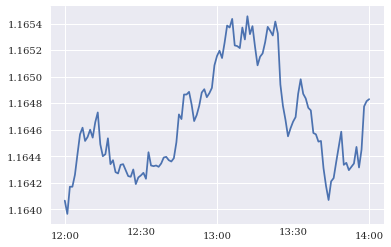

In [81]:
eur_usd_resam['Mid'].plot(grid=True)
# tag: eur_usd_resam
# title: Resampled EUR/USD exchange rate tick data

In [82]:
def reversal(x):
    return 2 * 1.16 - x

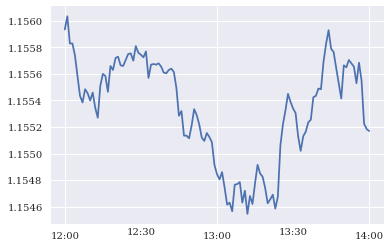

In [83]:
eur_usd_resam['Mid'].apply(reversal).plot()
# tag: aapl_resam_apply
# title: Resampled EUR/USD exchange rate tick data with function applied to it